# Edge Detection Filters
Let's learn about Sobel filters. The kernels are very simple. 

To detect vertical edges, we can use this kernel:
<math>
\begin{bmatrix} 
+1 & 0 & -1  \\
+2 & 0 & -2 \\
+1 & 0 & -1 
\end{bmatrix} 

To detect horizontal edges, we can use this kernel:
\begin{bmatrix} 
+1 & +2 & +1\\
 0 & 0 & 0 \\
-1 & -2 & -1
\end{bmatrix} 

</math>

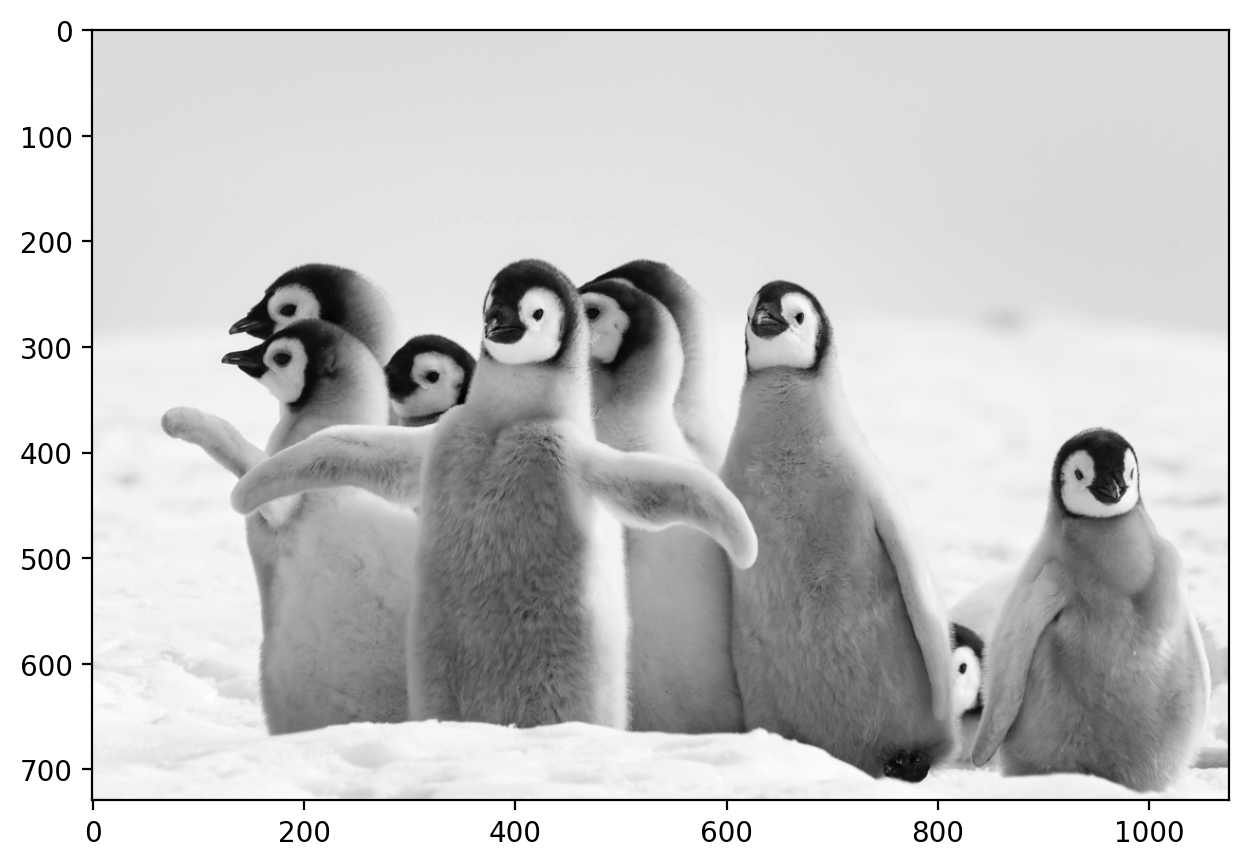

In [3]:
# Let's work with a picture of penguins

import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = 'retina'
from matplotlib import rcParams
import cv2
from EC_CV import * 

rcParams['figure.figsize'] = (10,5)

img = plt.imread('penguins.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img,cmap='gray')

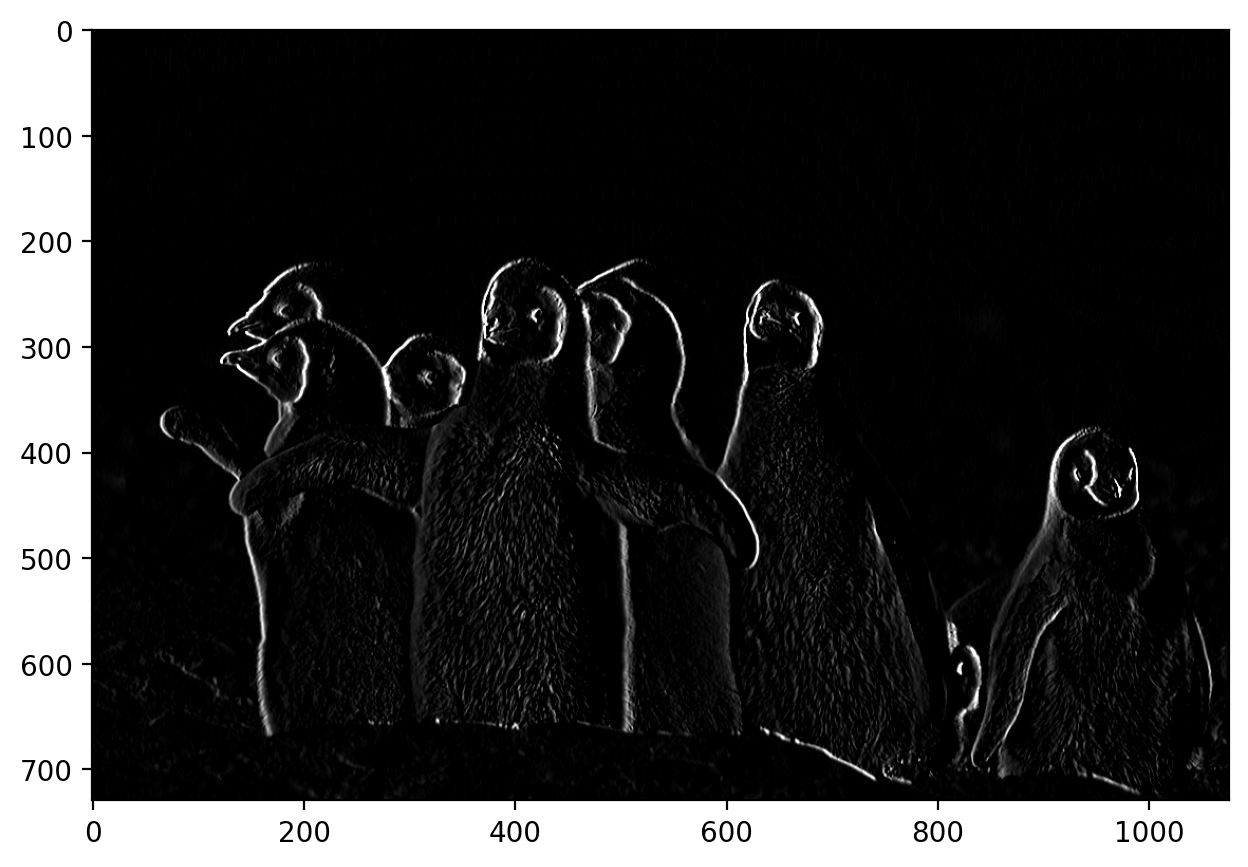

In [4]:
# Let's use a vertical Sobel filter

kernel = np.matrix([[1, 0, -1], 
                    [2, 0, -2],
                    [1, 0, -1]])

vr_edges = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)
plt.imshow(vr_edges,cmap='gray')

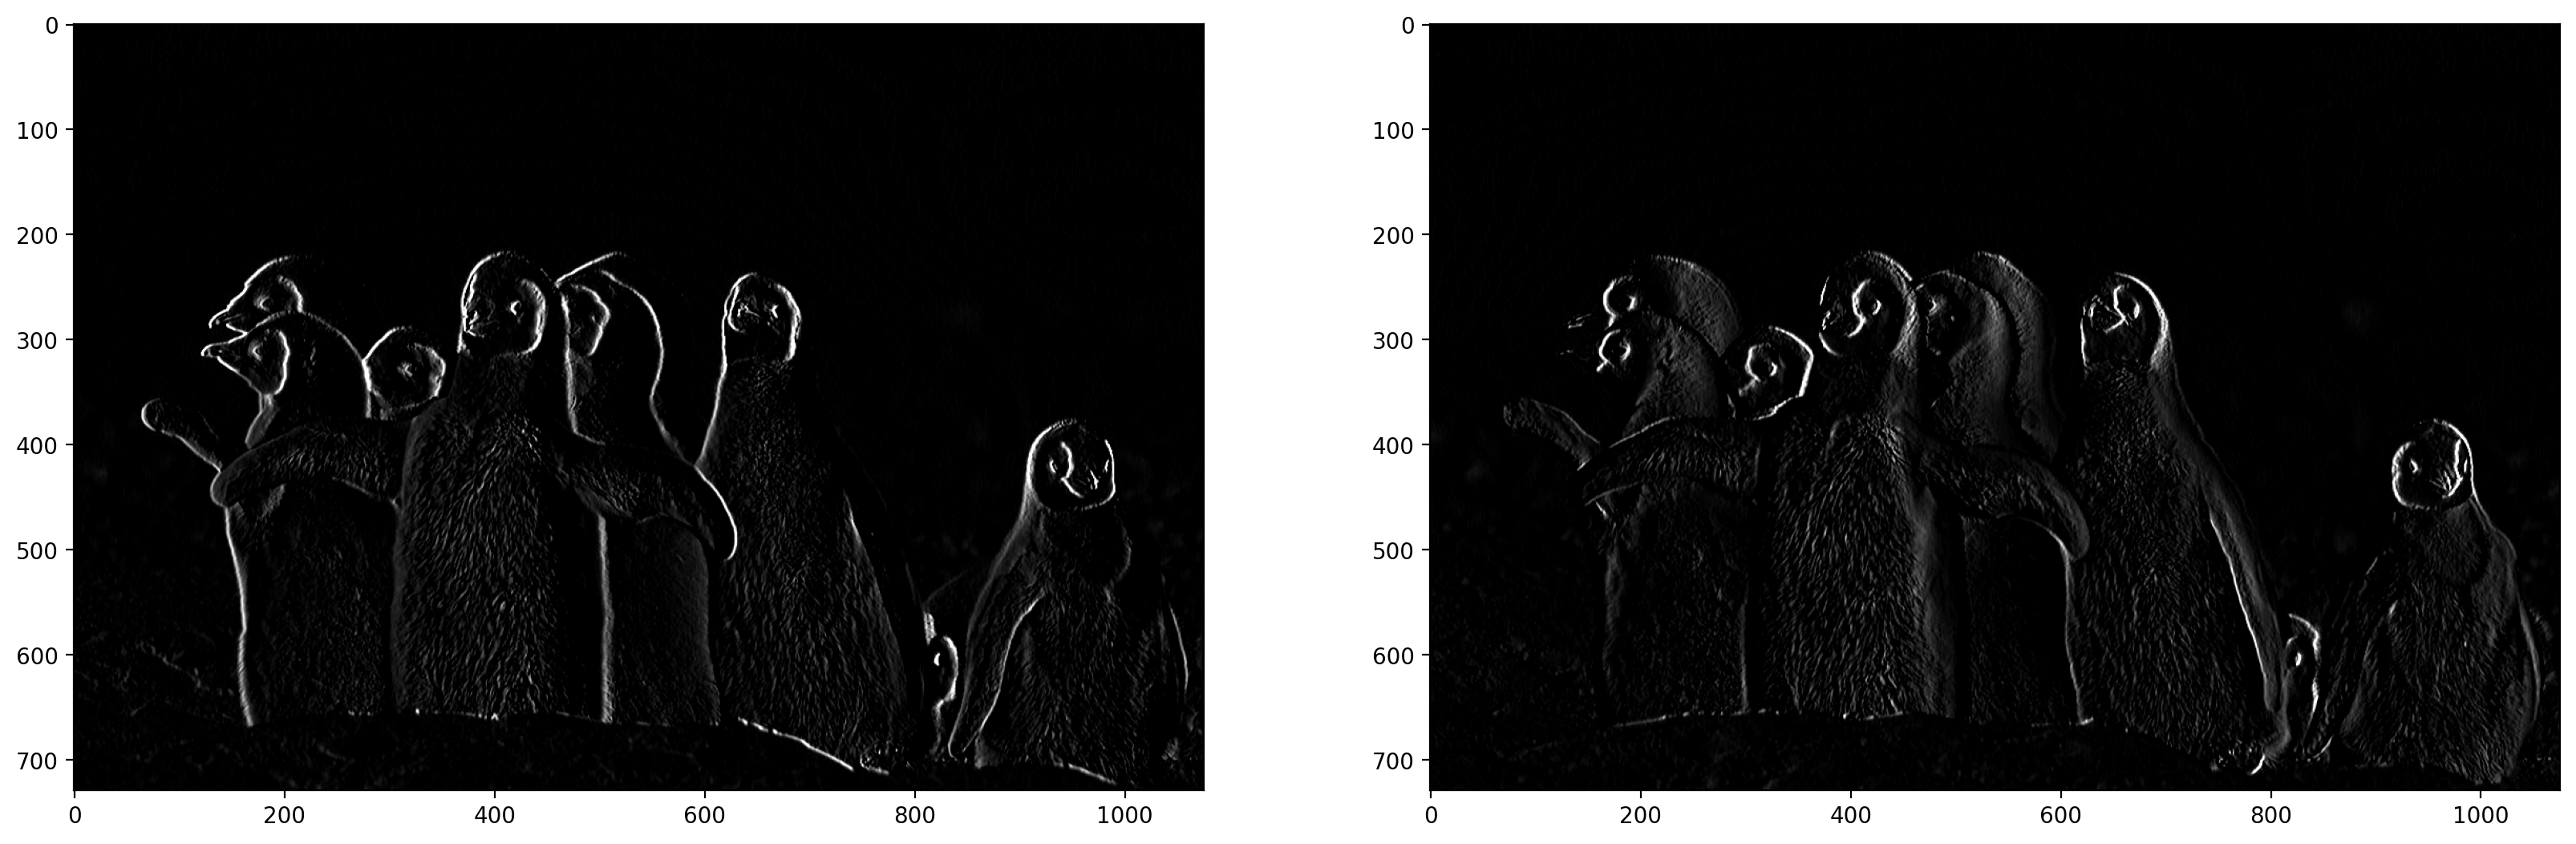

In [5]:
# Now let's use the opposite vertical Sobel filter

kernel = np.matrix([[-1, 0, 1], 
                    [-2, 0, 2],
                    [-1, 0, 1]])

vl_edges = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)

rcParams['figure.figsize'] = 20,8

# display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(vr_edges,cmap='gray')
ax[1].imshow(vl_edges,cmap='gray')


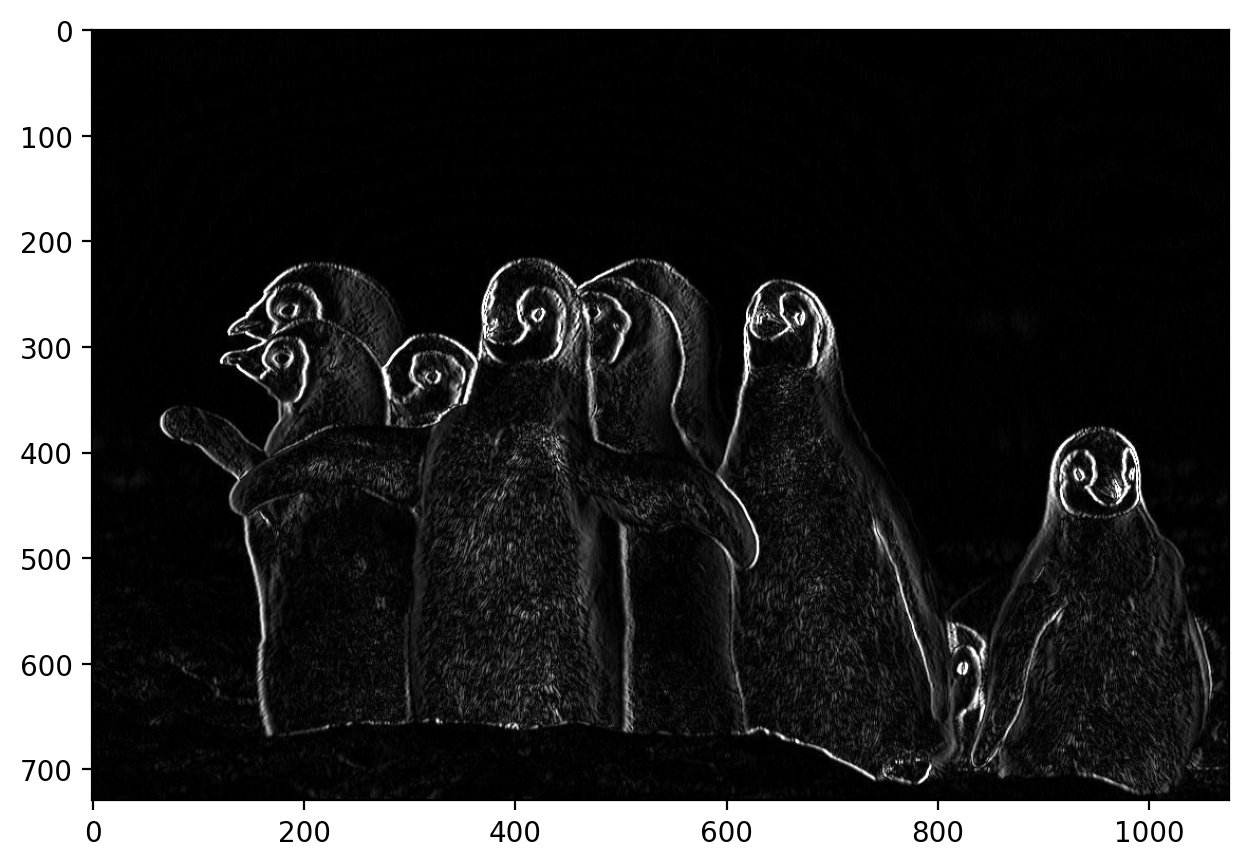

In [7]:
# Let's add the two vertical edge images

rcParams['figure.figsize'] = (10,5)

v_edges = cv2.add(vr_edges,vl_edges)
plt.imshow(v_edges,cmap='gray')

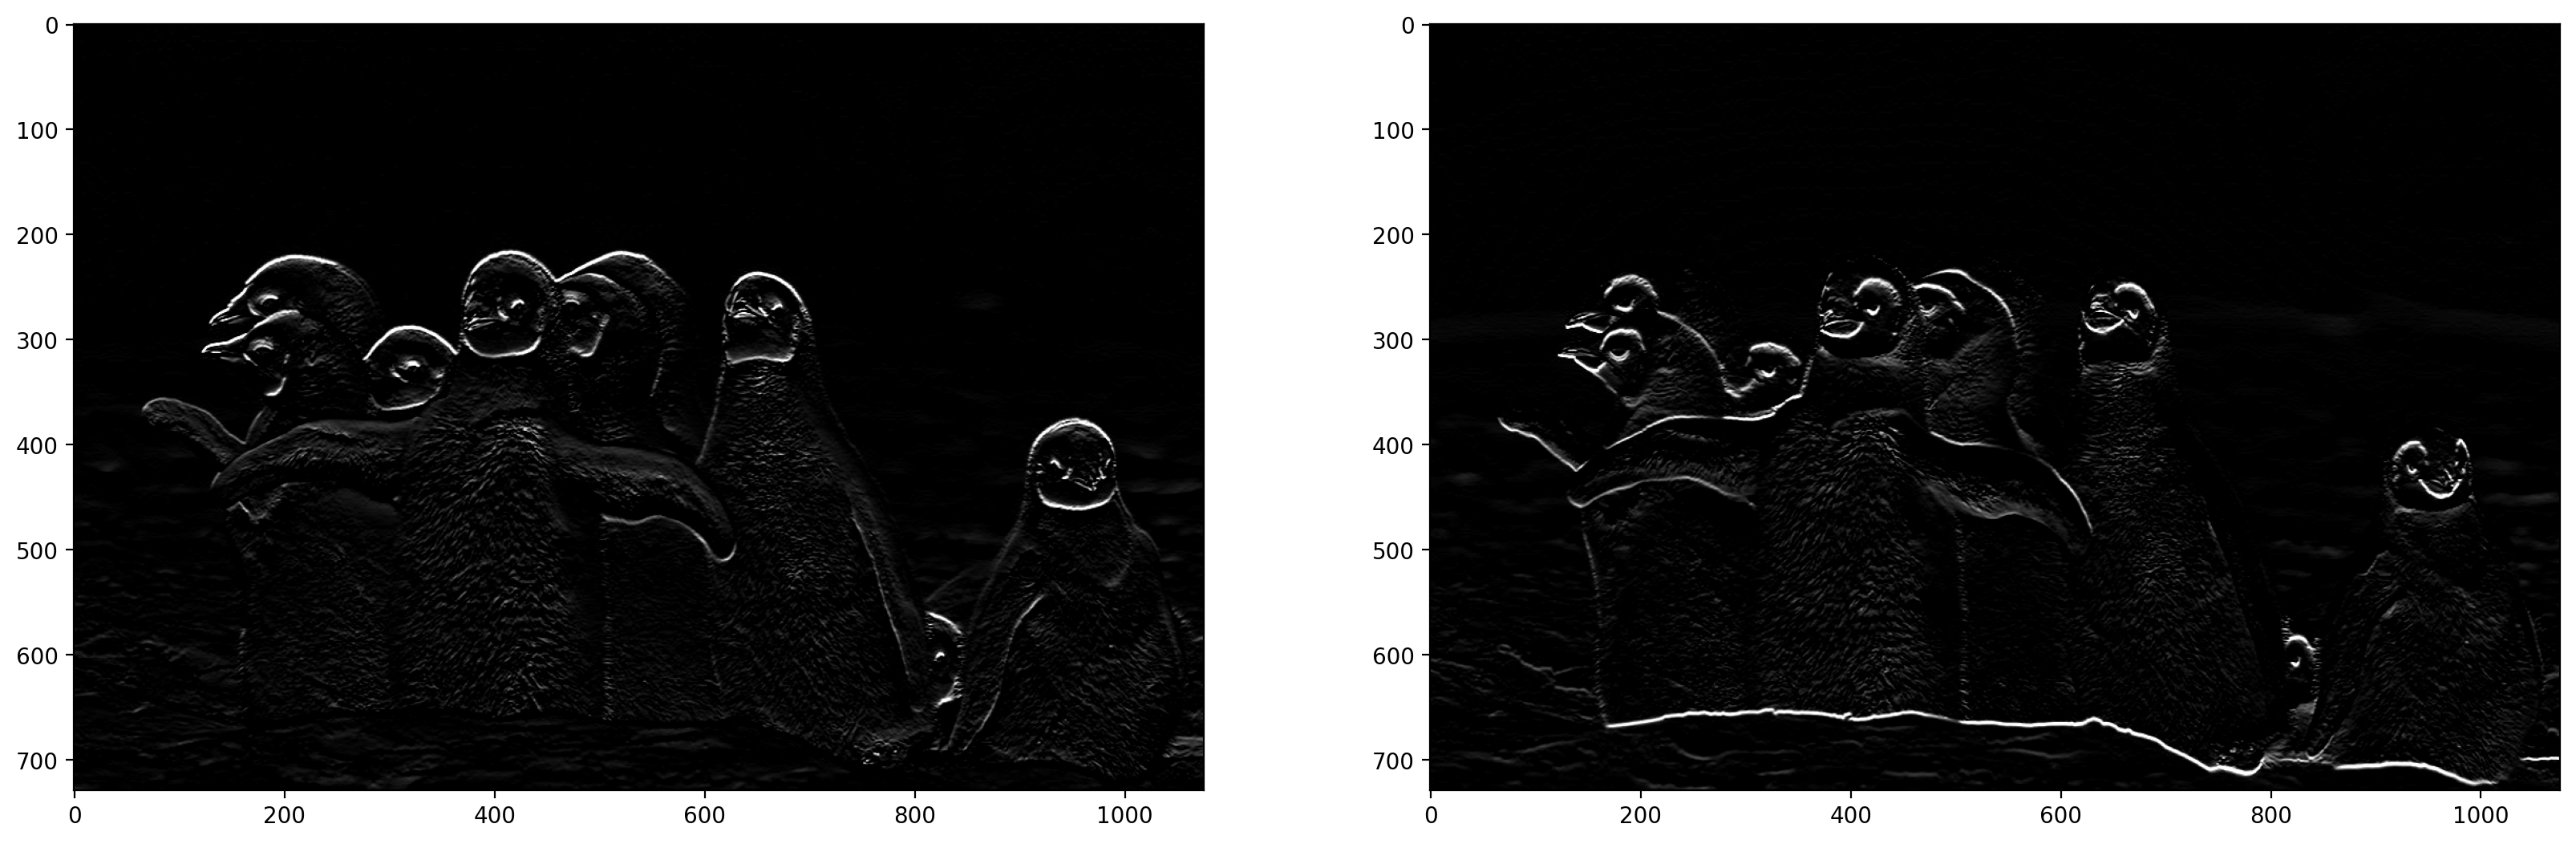

In [8]:
# Now let's do the same for horizontal Sobel filters

kernel = np.matrix([[ 1,  2,  1], 
                    [ 0,  0,  0],
                    [-1, -2, -1]])

hd_edges = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)

kernel = np.matrix([[-1, -2, -1], 
                    [ 0,  0,  0],
                    [ 1,  2,  1]])

hu_edges = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)

rcParams['figure.figsize'] = 20,8

# display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(hd_edges,cmap='gray')
ax[1].imshow(hu_edges,cmap='gray')

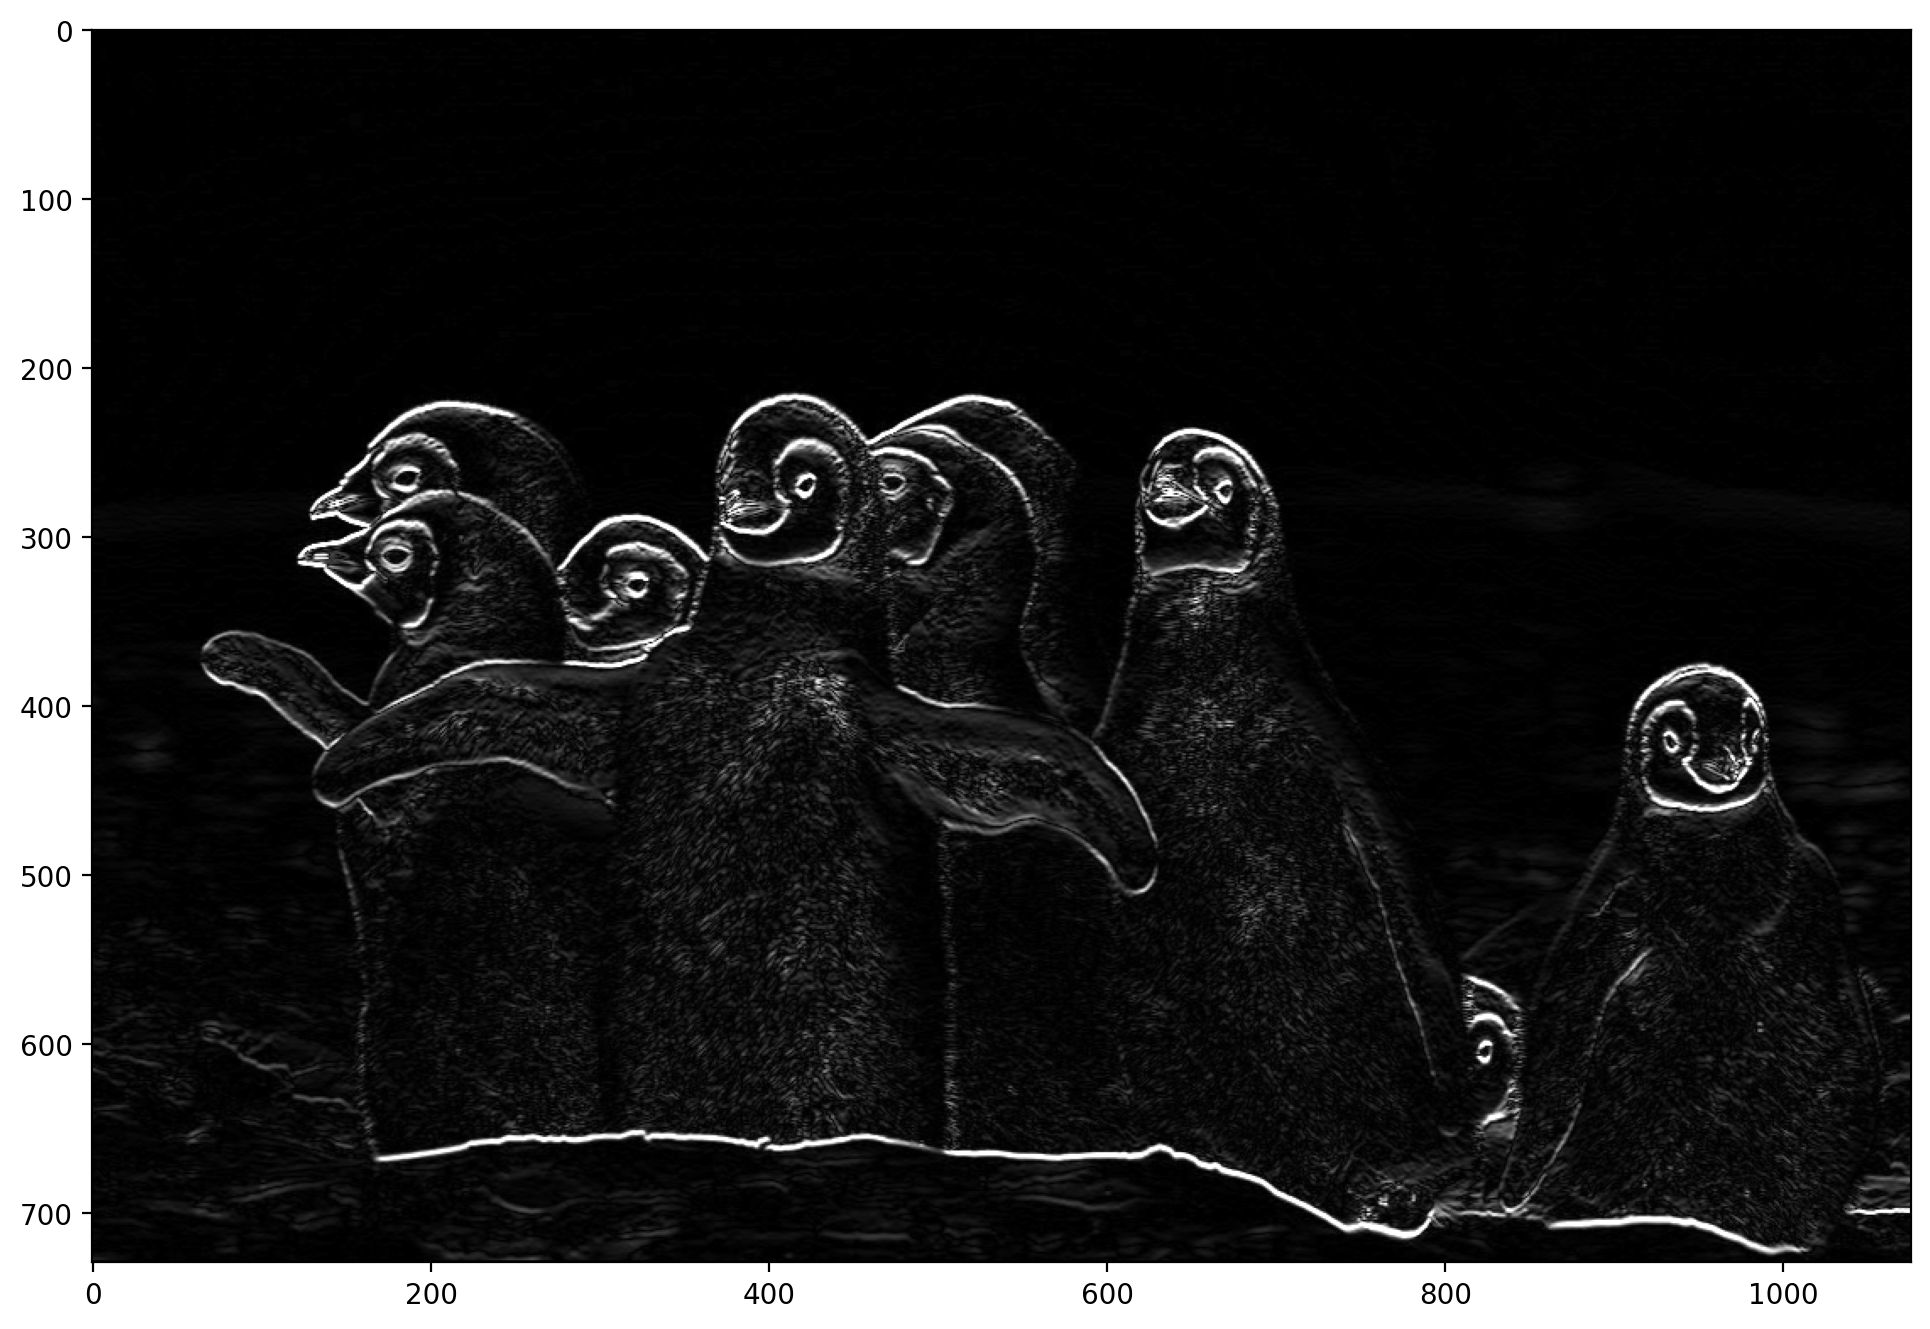

In [9]:
# Let's add the two images

h_edges = cv2.add(hd_edges,hu_edges)
plt.imshow(h_edges, cmap='gray')

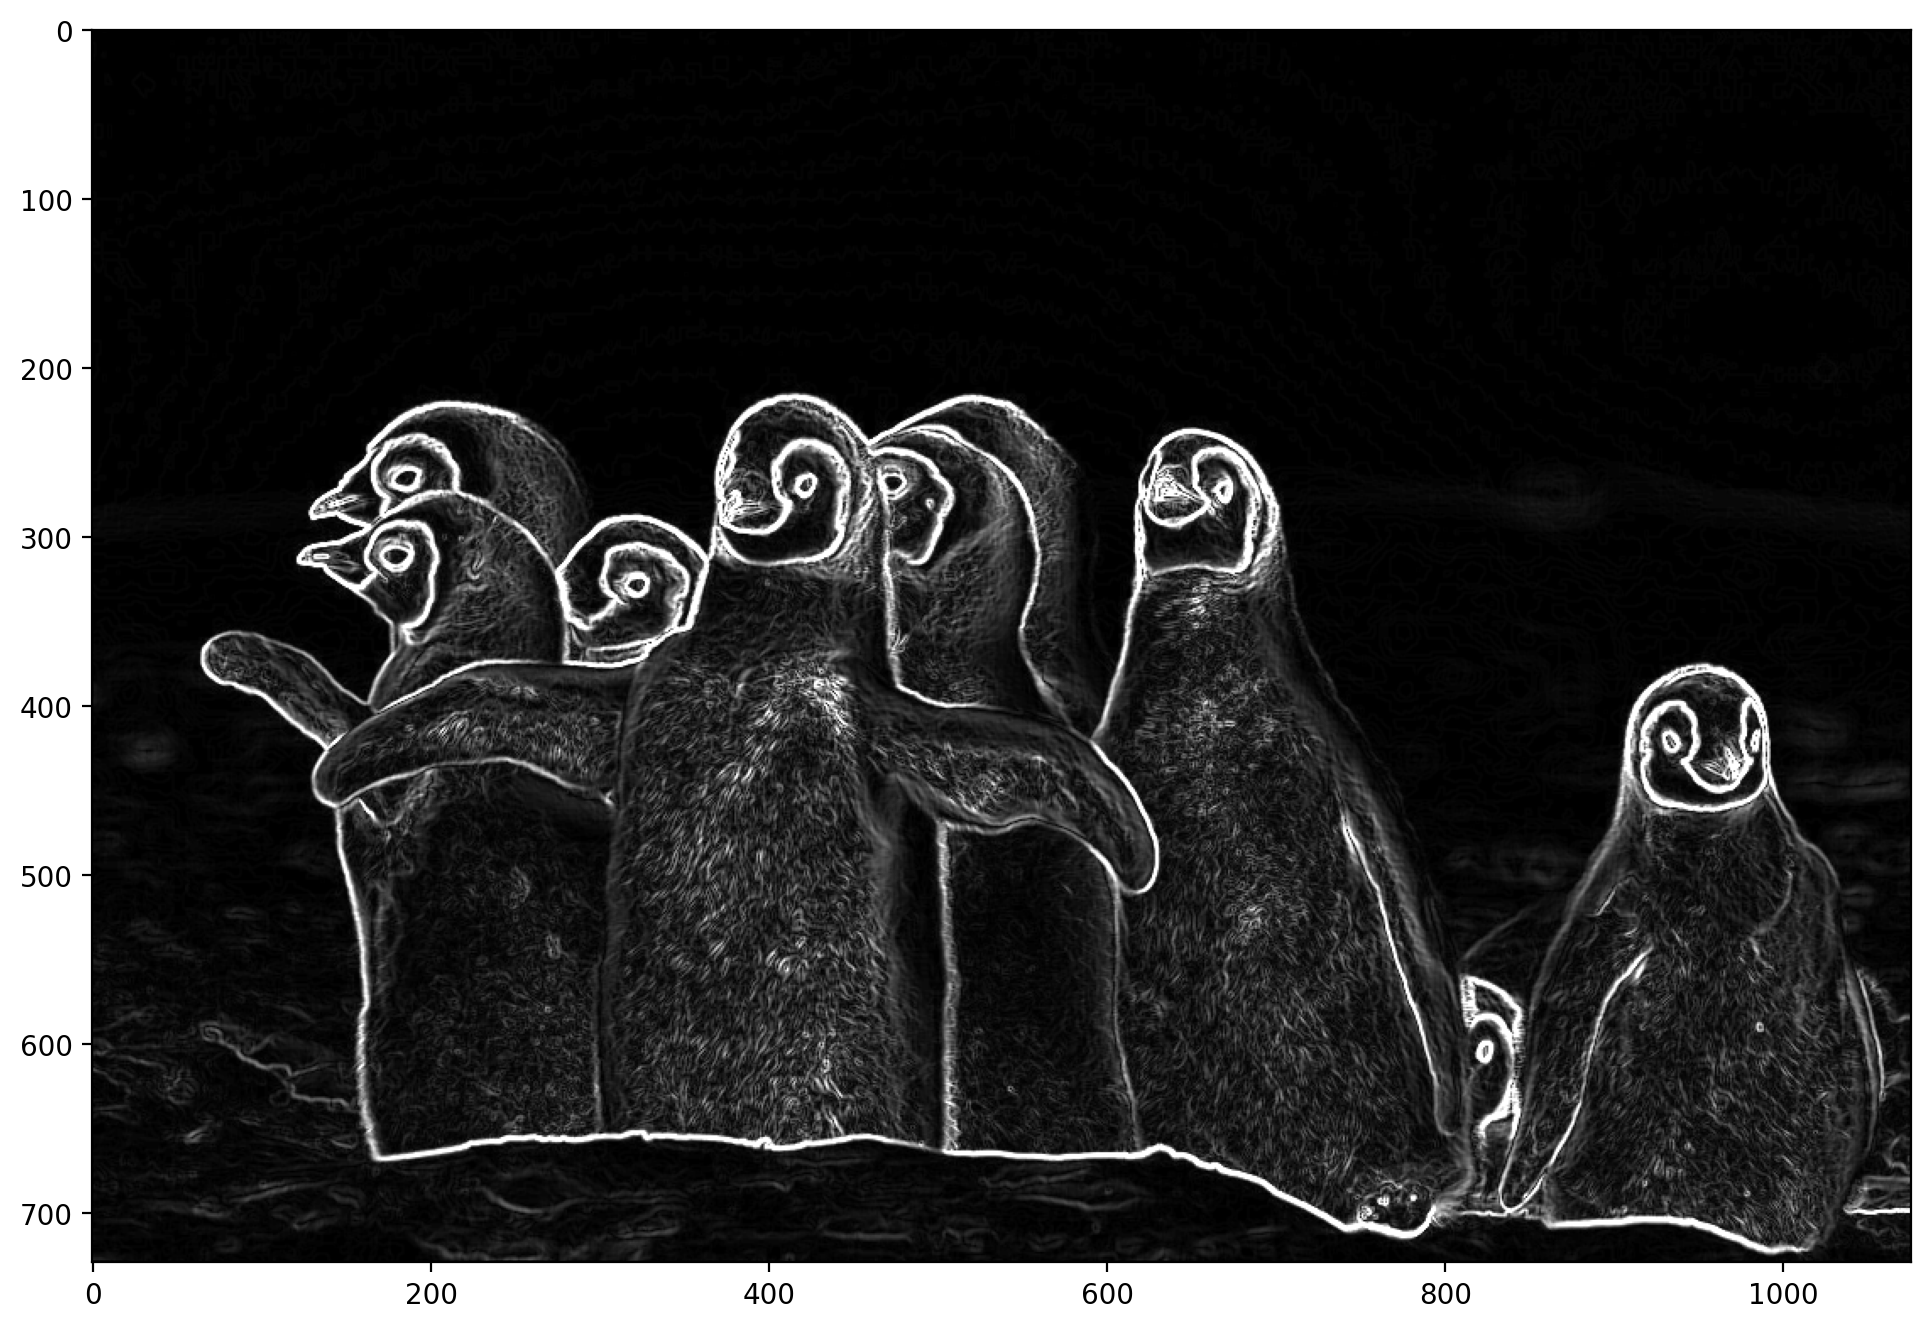

In [10]:
# Now let's add all edge images

all_edges = cv2.add(h_edges,v_edges) 
plt.imshow(all_edges, cmap='gray')


(729, 1076)


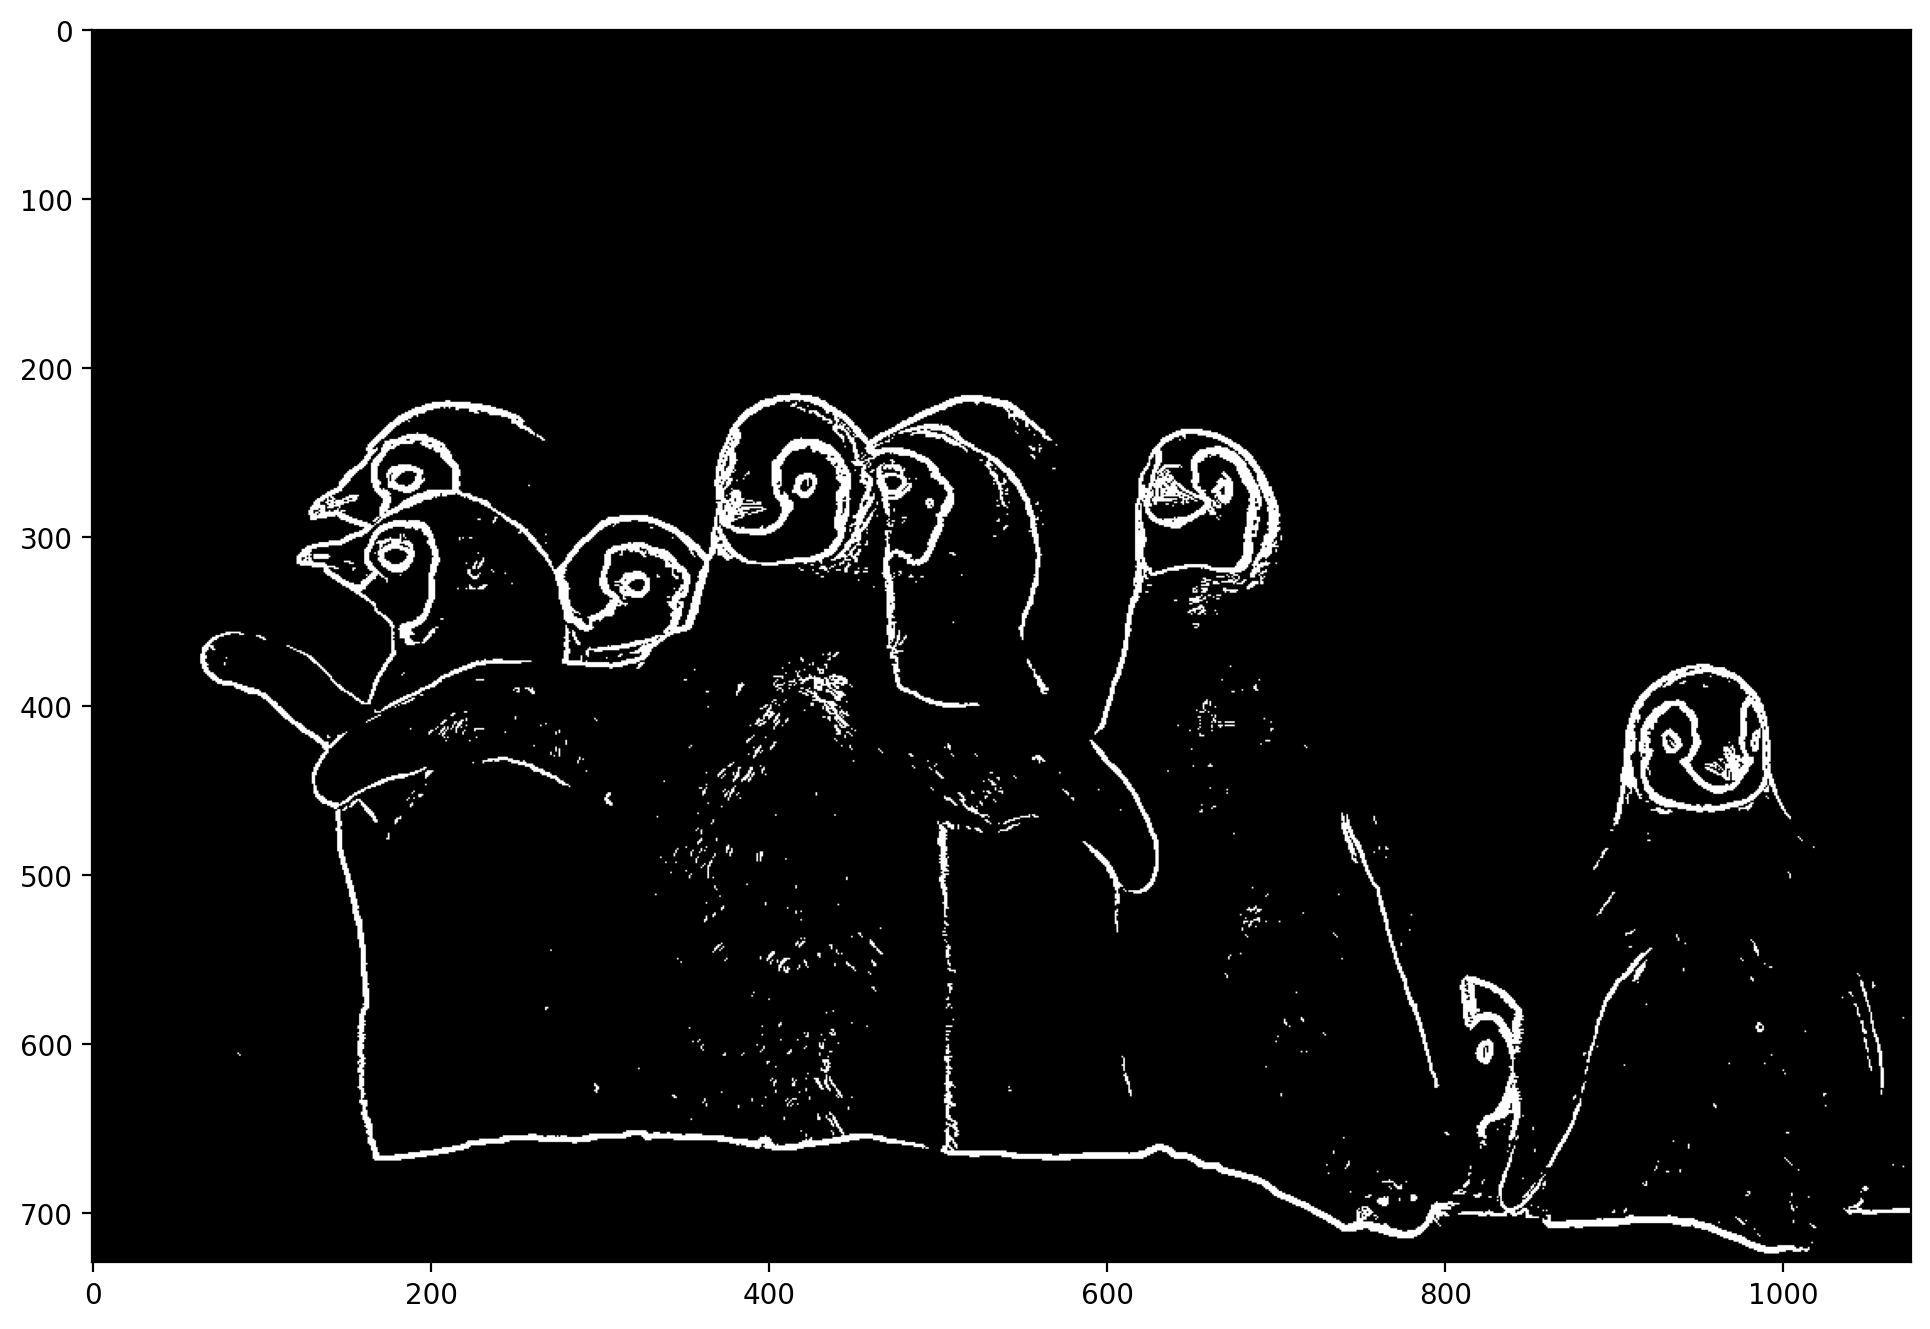

In [11]:
# Just for fun, let's turn it into black and white

(thresh, blackAndWhiteImage) = cv2.threshold(all_edges, 127, 255, cv2.THRESH_BINARY)
plt.imshow(blackAndWhiteImage, cmap='gray')
print(np.shape(blackAndWhiteImage))

(729, 1076)


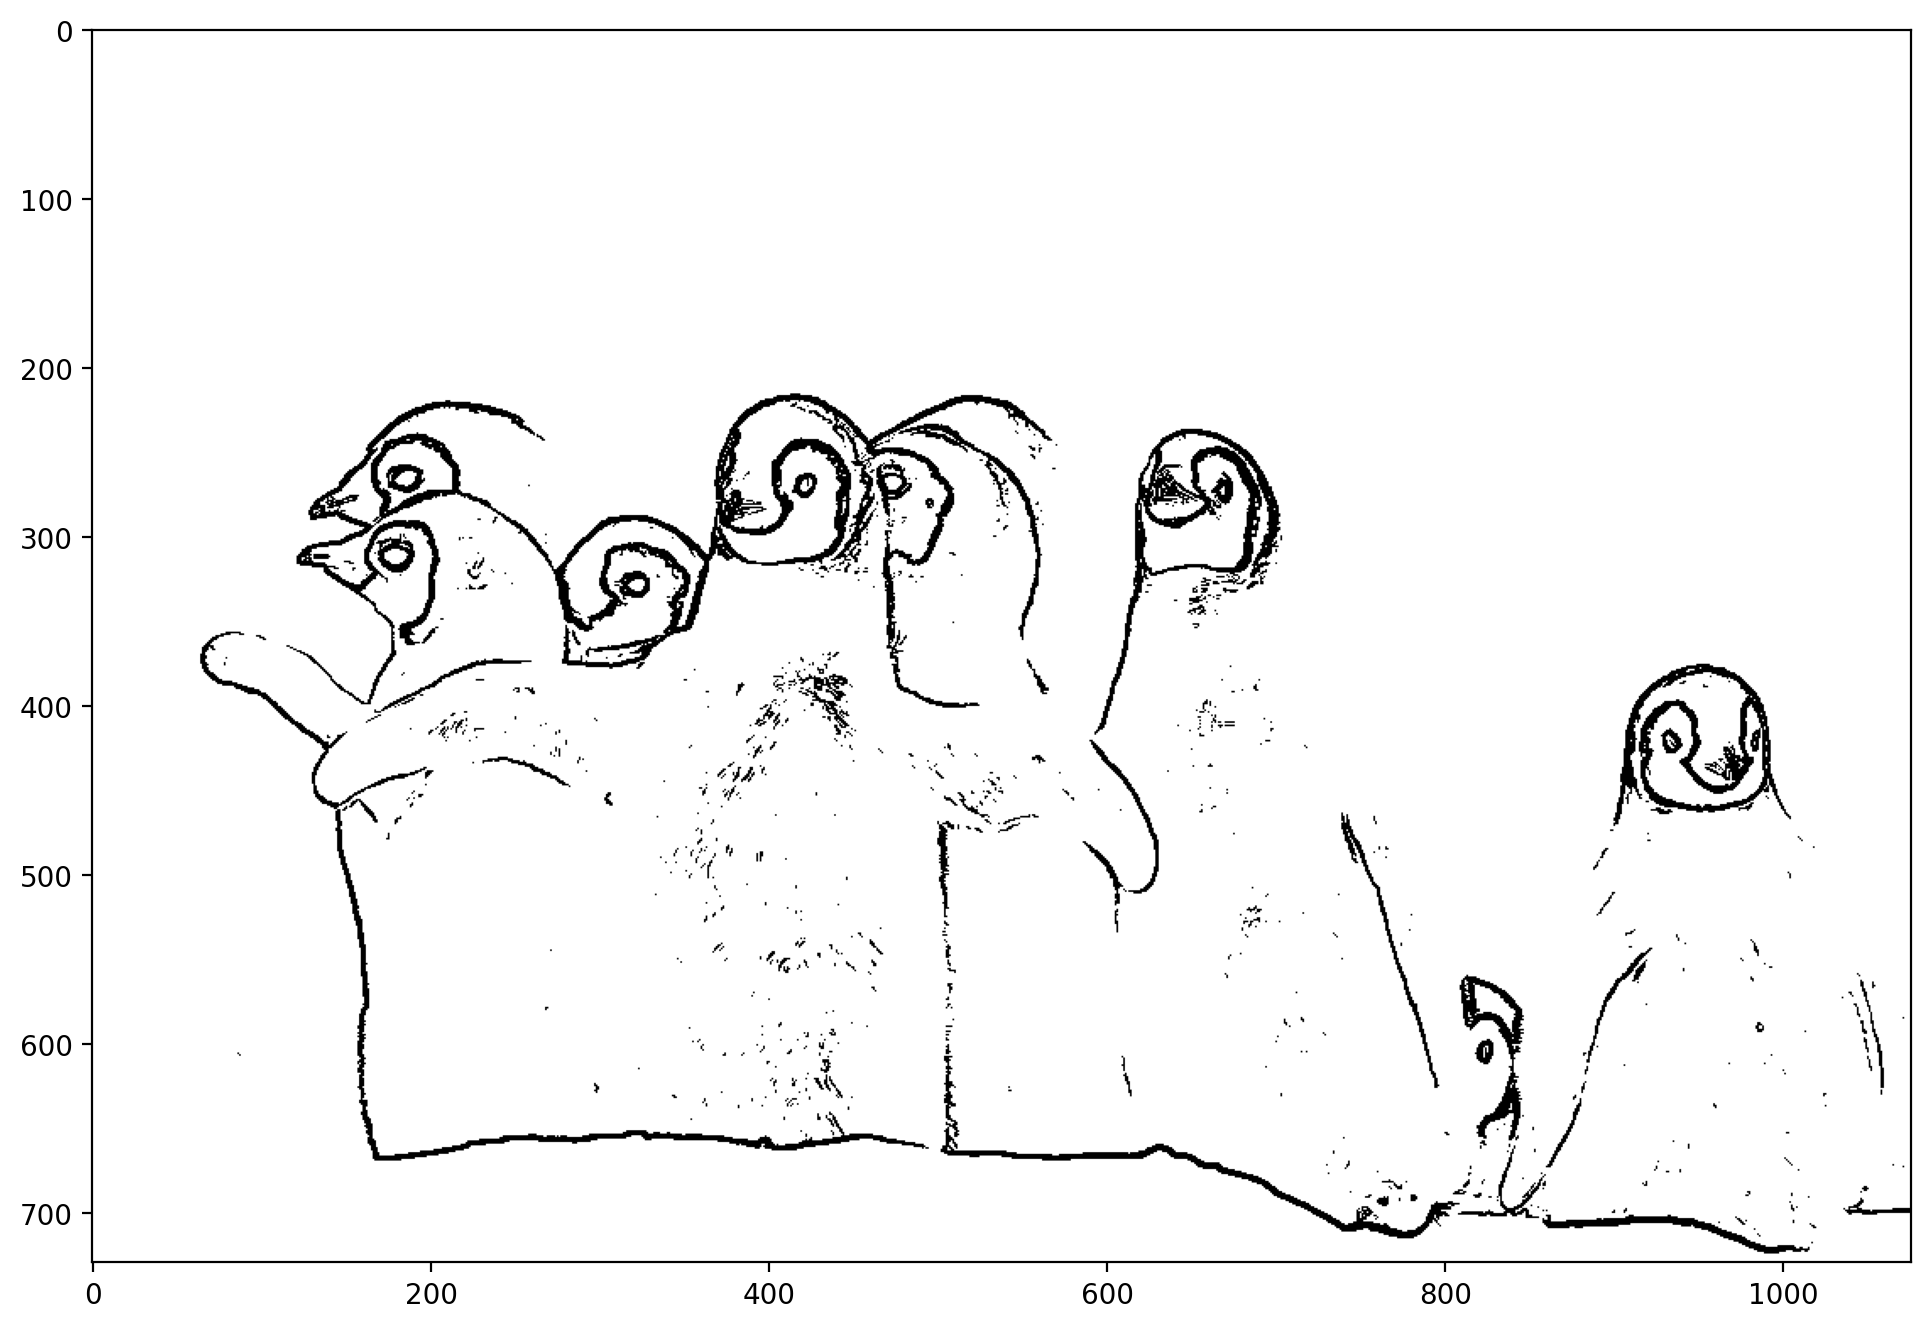

In [12]:
# Just for fun, let's turn it into black and white

plt.imshow(cv2.bitwise_not(blackAndWhiteImage), cmap='gray')
print(np.shape(blackAndWhiteImage))